In [4]:
import pandas as pd
from sklearn.metrics import f1_score

ground_truth = pd.read_csv('cleaned_annotations.csv')

ground_truth = ground_truth.drop(labels=['Unnamed: 0','raw','alternate_names'], axis=1).applymap(lambda s: s.lower())[3:]

In [5]:
predictions = pd.read_csv('./final_preds.csv')


In [6]:
predictions.to_csv('final_preds.csv', index=False)

In [7]:
evaluate = pd.concat([ground_truth.reset_index(),predictions],axis=1)

In [8]:
evaluate = evaluate.drop(labels='index', axis=1)

In [9]:
evaluate['bert_f1'] = evaluate['bert'] == evaluate['bird']
evaluate['flan_f1'] = evaluate['flan'] == evaluate['bird']
evaluate['gpt2_f1'] = evaluate['gpt2'] == evaluate['bird']

evaluate['bertscn_f1'] = evaluate['bert_scn'] == evaluate['scientific_name']
evaluate['flanscn_f1'] = evaluate['flan_scn'] == evaluate['scientific_name']
evaluate['gpt2scn_f1'] = evaluate['gpt2_scn'] == evaluate['scientific_name']

In [10]:
evaluate['truth'] = True

In [11]:
plot_df = pd.DataFrame((0.17,0.037,f1_score(evaluate['truth'],evaluate['bert_f1']),f1_score(evaluate['truth'],evaluate['bertscn_f1']),f1_score(evaluate['truth'],evaluate['flan_f1']),f1_score(evaluate['truth'],evaluate['flanscn_f1']),f1_score(evaluate['truth'],evaluate['gpt2_f1']),f1_score(evaluate['truth'],evaluate['gpt2scn_f1'])))
plot_df.columns=['F1 score']
plot_df['Model'] = ['t5-qa','t5-qa','bert-uncased-large', 'bert-uncased-large', 'flan-t5-large', 'flan-t5-large', 'GPT2-large', 'GPT2-large']
plot_df['entity_type'] = ['Bird Name', 'Scientific Name','Bird Name', 'Scientific Name','Bird Name', 'Scientific Name','Bird Name', 'Scientific Name']

In [12]:
plot_df

,F1 score,Model,entity_type
0,0.170000,t5-qa,Bird Name
1,0.037000,t5-qa,Scientific Name
2,0.000000,bert-uncased-large,Bird Name
3,0.000000,bert-uncased-large,Scientific Name
4,0.700624,flan-t5-large,Bird Name
5,0.764822,flan-t5-large,Scientific Name
6,0.815166,GPT2-large,Bird Name
7,0.936170,GPT2-large,Scientific Name


Text(0.5, 1.0, 'Model Performances')

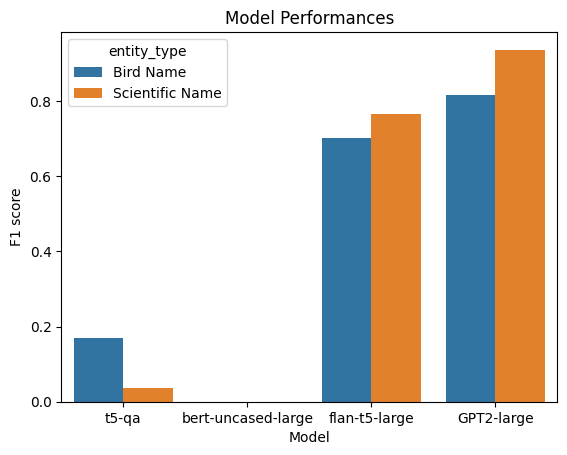

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=plot_df, x='Model', y='F1 score', hue='entity_type')
plt.title('Model Performances')